In [18]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load data
rf = pd.read_csv("/Users/arsenpankiv/Desktop/Python_practice/small_dataset.csv")

# Clean data
rf["date"] = pd.to_datetime(rf["date"])
rf["skills_list"] = rf["skills_list"].apply(
    lambda skills: ast.literal_eval(skills) if isinstance(skills, str) else skills
)



In [49]:
stat = rf[rf["job_title"] == "Statistician"].copy()
stat = stat.dropna(subset=["mean_salary"])
stat_exploded = stat.explode("skills_list")

stat_pivot = stat_exploded.pivot_table(index="skills_list", values="mean_salary", aggfunc=["count","median"])
stat_sorted = stat_pivot.sort_values(by=("count", "mean_salary"), ascending= False)
print(stat_sorted.columns)

# let's now convert from tuple type into an object
stat_sorted.columns = stat_sorted.columns.map('_'.join)
print(stat_sorted.columns)
# let's now rename these two columns
stat_renamed =stat_sorted.rename(columns=({'count_mean_salary': "skill_count_r", "median_mean_salary": "mean_salary_r"}))
stat_renamed.index.name = None
# stat_sorted_reset = stat_renamed.reset_index(inplace=True)
stat_renamed

MultiIndex([( 'count', 'mean_salary'),
            ('median', 'mean_salary')],
           )
Index(['count_mean_salary', 'median_mean_salary'], dtype='object')


,skill_count_r,mean_salary_r
Probability,4,21386.0
Regression,4,21386.0
SAS,4,21386.0
Data Analysis,3,21314.0
Python,3,21314.0
R,3,21314.0
Data Cleaning,1,20911.0
Machine Learning,1,20911.0
Statistics,1,20911.0


In [55]:
# let's now add percentages using original dataframe 

job_count1 = len(stat)
# shows the number of rows - this will provide us with the number of job postings
stat_renamed["skill_percent"] = stat_renamed["skill_count_r"] / job_count1 * 100
# let's now put a limit alike threshhold for percentages
perc_lim = 11
stat_renamed_limit = stat_renamed[stat_renamed["skill_percent"] > perc_lim]
stat_renamed_limit

,skill_count_r,mean_salary_r,skill_percent
Probability,4,21386.0,44.444444
Regression,4,21386.0,44.444444
SAS,4,21386.0,44.444444
Data Analysis,3,21314.0,33.333333
Python,3,21314.0,33.333333
R,3,21314.0,33.333333
Data Cleaning,1,20911.0,11.111111
Machine Learning,1,20911.0,11.111111
Statistics,1,20911.0,11.111111


0 Probability
1 Regression
2 SAS
3 Data Analysis
4 Python
5 R
6 Data Cleaning
7 Machine Learning
8 Statistics


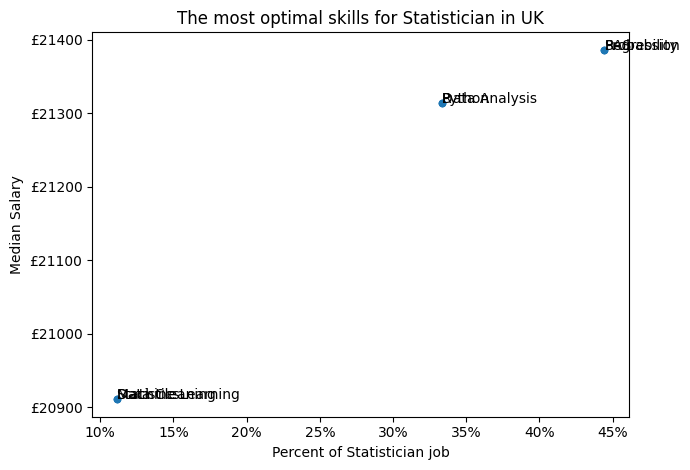

In [64]:
stat_renamed_limit.plot(kind="scatter", x="skill_percent",y="mean_salary_r" )
plt.xlabel("Percent of Statistician job")
plt.ylabel("Median Salary")
plt.title("The most optimal skills for Statistician in UK")
plt.tight_layout()

"""let's now add the name of skills because it doesn't add this automatically"""
for index, value23 in enumerate(stat_renamed_limit.index):
    print(index, value23)
    plt.text(stat_renamed_limit["skill_percent"].iloc[index], stat_renamed_limit["mean_salary_r"].iloc[index], value23)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, posi:f"£{x:.0f}"))

from matplotlib.ticker import  PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=False))
plt.show()


stat_sorted.columns
This is a MultiIndex object, where each column is a tuple:

[('count', 'mean_salary'), ('median', 'mean_salary')]

The .map() function applies a function to each element in the Index (or MultiIndex in this case).

'_'.join is a string method that takes an iterable (like a tuple) and joins the elements with underscores.

So for each tuple like ('count', 'mean_salary'), it becomes:

'_'.join(('count', 'mean_salary'))  -->  'count_mean_salary'


After running that line, the column names change from this:

MultiIndex([
    ('count', 'mean_salary'),
    ('median', 'mean_salary')
])
To this:

Index(['count_mean_salary', 'median_mean_salary'], dtype='object')
Now your columns are simple strings, and you can rename them or work with them easily.


.map('_'.join)
Converts ('a', 'b') → 'a_b'




 .map() method is very flexible — it can take any function and apply it to each element of a pandas Index, Series, or DataFrame axis.

When used with MultiIndex columns like yours, .map() can be paired with any function that takes a tuple (since each column is a tuple in a MultiIndex) and returns a new value.

stat_sorted.columns = stat_sorted.columns.map(lambda x: f"{x[0].upper()}--{x[1]}")
Result:
('count', 'mean_salary') → 'COUNT--mean_salary'



If you want only the first or second part of the tuple:


stat_sorted.columns = stat_sorted.columns.map(lambda x: x[0])  # Just 'count' and 'median'
# or
stat_sorted.columns = stat_sorted.columns.map(lambda x: x[1]) 


stat_sorted.columns = stat_sorted.columns.map(lambda x: x[0].replace('count', 'cnt') + "_" + x[1])
Result:
('count', 'mean_salary') → 'cnt_mean_salary'